In [1]:
import numpy as np

from keras.datasets import imdb

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old



Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [2]:
def printReview(index):
  word_index = imdb.get_word_index() 
  reverse_word_index = dict( \
  [(value, key) for (key, value) in word_index.items()]) 
  decoded_review = ' '.join( \
  [reverse_word_index.get(i - 3, '?') for i in train_data[index]])
  print(decoded_review)

In [3]:
printReview(0)
printReview(1)
printReview(2)

1646592/1641221 [==============================] - 1s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [4]:
def findrepeats():
    for x in train_data:
        if len(x) != len(set(x)):
            print("repeated words exist")
            return
    print('no repeats')

findrepeats()

repeated words exist


In [7]:
#transform list to tensor
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_train[25000]

IndexError: index 25000 is out of bounds for axis 0 with size 25000

In [17]:
from keras import models
from keras import layers

In [45]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [46]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [48]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 133us/step - loss: 0.5439 - acc: 0.7649 - val_loss: 0.4128 - val_acc: 0.8674
Epoch 2/3
15000/15000 [==============================] - 2s 104us/step - loss: 0.3317 - acc: 0.8986 - val_loss: 0.3226 - val_acc: 0.8833
Epoch 3/3
15000/15000 [==============================] - 2s 103us/step - loss: 0.2406 - acc: 0.9268 - val_loss: 0.2841 - val_acc: 0.8896


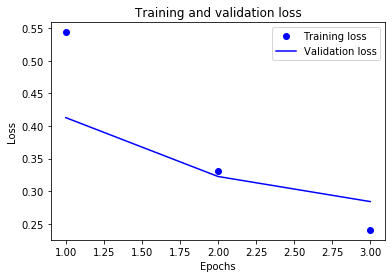

In [49]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

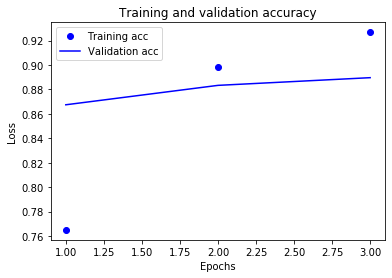

In [50]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.predict(x_test)

array([[0.31276152],
       [0.98423123],
       [0.8102881 ],
       ...,
       [0.11769232],
       [0.20355287],
       [0.50365883]], dtype=float32)